# Develop A Neural Network That Can Read Handwriting

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
import random
import tensorflow.keras as keras
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D,BatchNormalization
from tensorflow.keras import backend as k
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from keras.models import model_from_json
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
%matplotlib inline

#### Reading data

In [3]:
(train_ing,train_labels),(test_ing,test_labels) = datasets.mnist.load_data()

#### Normalize Image

In [4]:
train_ing,test_ing = train_ing/255.0, test_ing/255.0

In [5]:
len(train_ing)

60000

In [6]:
len(test_ing)

10000

#### Visualizing Image

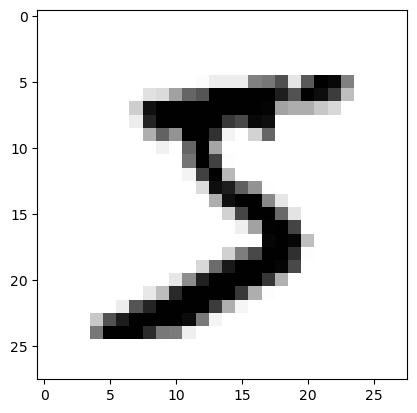

In [7]:
plt.imshow(train_ing[0],cmap=plt.cm.gray_r,interpolation='nearest')

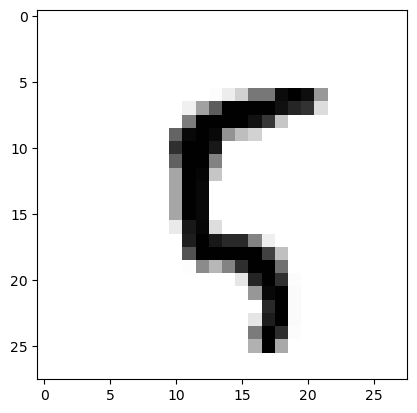

In [8]:
plt.imshow(train_ing[100],cmap=plt.cm.gray_r,interpolation='nearest')

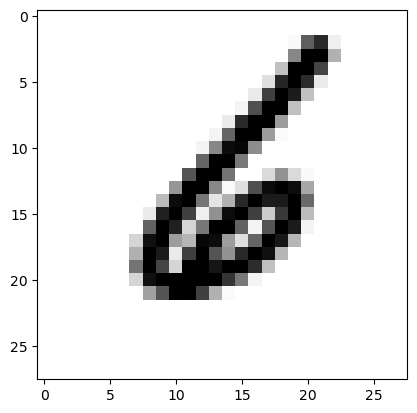

In [9]:
plt.imshow(train_ing[999],cmap=plt.cm.gray_r,interpolation='nearest')

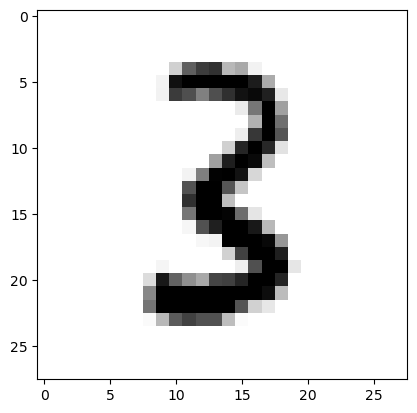

In [10]:
plt.imshow(train_ing[50000],cmap=plt.cm.gray_r,interpolation='nearest')

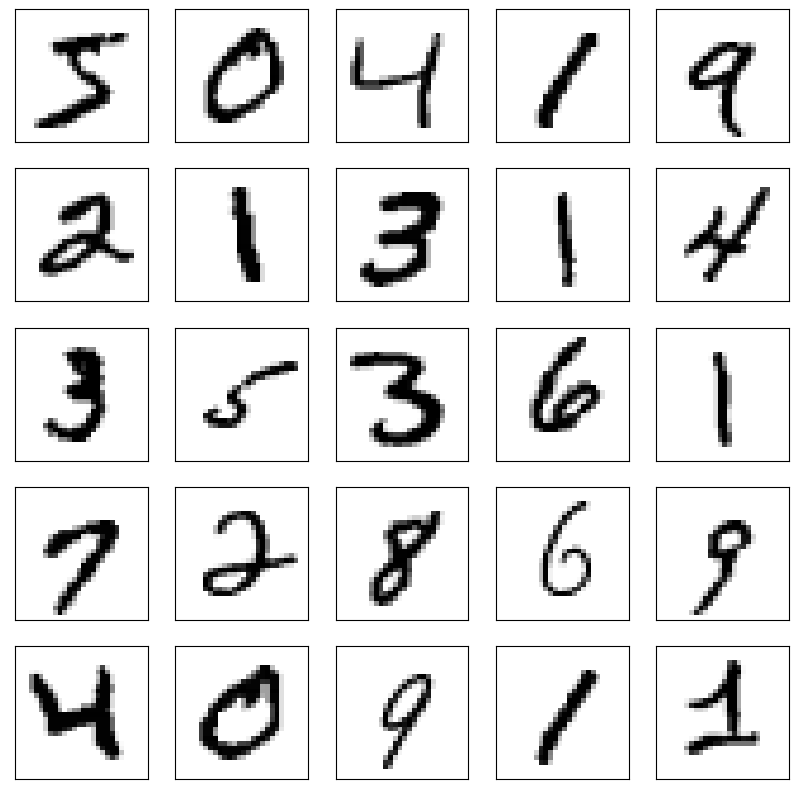

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_ing[i],cmap=plt.cm.binary)
plt.show()

#### Create and train the model

#### Sequential model

In [12]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(10)
])

In [14]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(0.001),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [15]:
model.fit(
        train_ing,train_labels,
        epochs=10,
        validation_data=(test_ing,test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2568 - sparse_categorical_accuracy: 0.9258 - val_loss: 0.1455 - val_sparse_categorical_accuracy: 0.9569
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1111 - sparse_categorical_accuracy: 0.9673 - val_loss: 0.0957 - val_sparse_categorical_accuracy: 0.9699
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0761 - sparse_categorical_accuracy: 0.9766 - val_loss: 0.0780 - val_sparse_categorical_accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0561 - sparse_categorical_accuracy: 0.9826 - val_loss: 0.0770 - val_sparse_categorical_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0445 - sparse_categorical_accuracy: 0.9863 - val_loss: 0.0703 - val_sparse_categorical_accuracy: 0.9789
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0335 - spars

#### Model Summary

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### Flatten

In [17]:
model.add(layers.Flatten())

#### Adding Dense Layer

In [18]:
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

#### Train the Model

In [19]:
model.fit(train_ing,train_labels,epochs=12,validation_data=(test_ing,test_labels))

Epoch 1/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0131 - sparse_categorical_accuracy: 0.9958 - val_loss: 0.0912 - val_sparse_categorical_accuracy: 0.9761
Epoch 2/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0105 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.0950 - val_sparse_categorical_accuracy: 0.9776
Epoch 3/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0101 - sparse_categorical_accuracy: 0.9967 - val_loss: 0.0900 - val_sparse_categorical_accuracy: 0.9784
Epoch 4/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0087 - sparse_categorical_accuracy: 0.9973 - val_loss: 0.0870 - val_sparse_categorical_accuracy: 0.9796
Epoch 5/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0082 - sparse_categorical_accuracy: 0.9973 - val_loss: 0.0866 - val_sparse_categorical_accuracy: 0.9788
Epoch 6/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0067 - spars

#### Model Summary

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                704       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 103,124
Trainable params: 103,124
Non-trai